In [6]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [7]:
WineData = pd.read_csv('winequality-red.csv')
WineData.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
WineData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


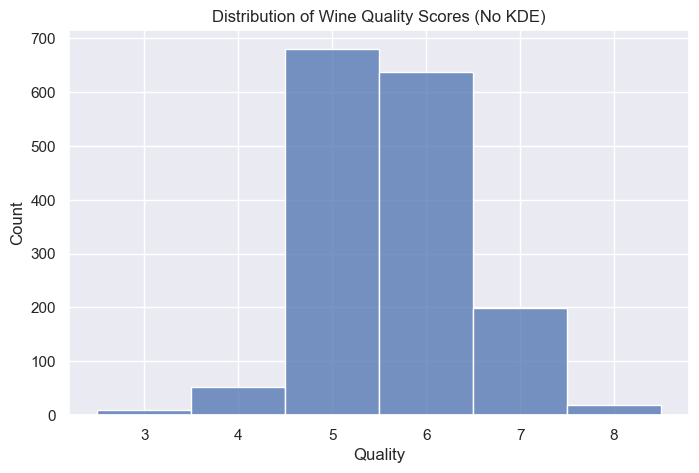

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(WineData['quality'], bins=range(3, 10), discrete=True)
plt.title("Distribution of Wine Quality Scores (No KDE)")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


Correlation of features with wine quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


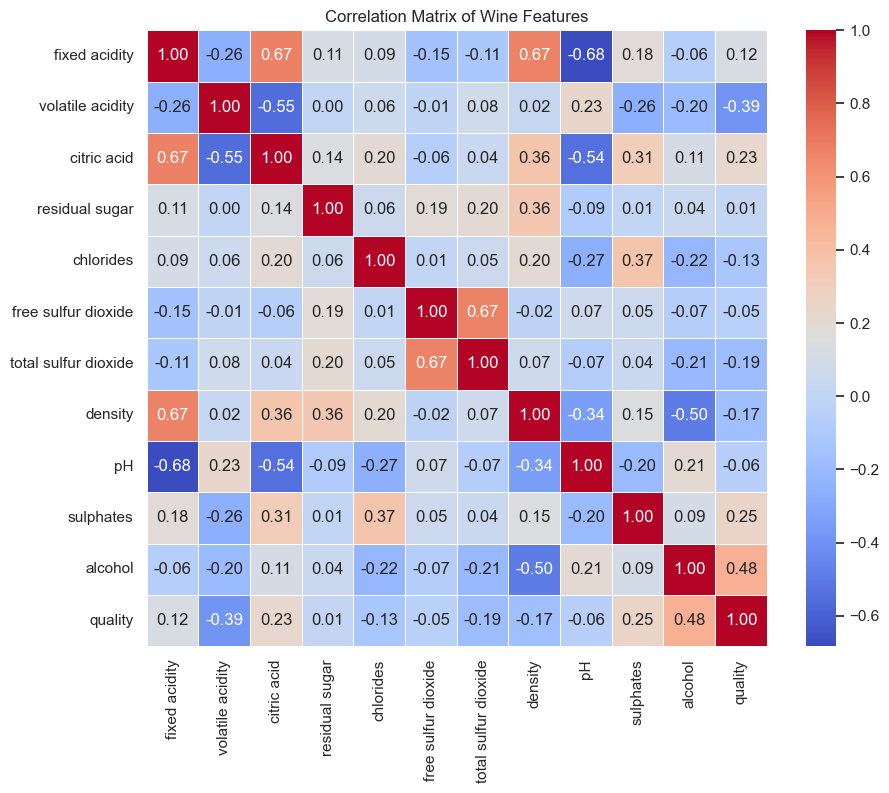

In [17]:
corr_matrix = WineData.corr()

print("Correlation of features with wine quality:")
print(corr_matrix['quality'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wine Features")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# X = Features, y = Target variable
X = WineData.drop('quality', axis=1)
y = WineData['quality']

#80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)




Training set size: (1279, 11)
Test set size: (320, 11)


In [21]:
#Linear Reg model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

linreg = LinearRegression()
linreg.fit(X_train, y_train)




LinearRegression()

In [24]:
#predictions
y_pred_lr = linreg.predict(X_test)

#evaluation matrics 
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(rmse)

r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Evaluation:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)



Linear Regression Model Evaluation:
MAE: 0.503530441552438
RMSE: 0.6245199307980125
R^2: 0.4031803412796229


In [27]:
#random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and target
X = WineData.drop("quality", axis=1)
y = WineData["quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"MAE  : {mae_rf:.3f}")
print(f"RMSE : {rmse_rf:.3f}")
print(f"R²   : {r2_rf:.3f}")

Random Forest Regressor Results:
MAE  : 0.422
RMSE : 0.549
R²   : 0.539


In [28]:
#random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and target
X = WineData.drop("quality", axis=1)
y = WineData["quality"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"MAE  : {mae_rf:.3f}")
print(f"RMSE : {rmse_rf:.3f}")
print(f"R²   : {r2_rf:.3f}")

Random Forest Regressor Results:
MAE  : 0.450
RMSE : 0.565
R²   : 0.512


In [32]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Results:")
print(f"MAE  : {mae_xgb:.3f}")
print(f"RMSE : {rmse_xgb:.3f}")
print(f"R²   : {r2_xgb:.3f}")


XGBoost Regressor Results:
MAE  : 0.410
RMSE : 0.549
R²   : 0.540


In [33]:
#accuracy trial
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_rounded = np.round(y_pred_xgb)
y_pred_rounded = np.clip(y_pred_rounded, y_test.min(), y_test.max())


# Calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_rounded)

print(f"Rounded Accuracy: {acc * 100:.2f}%")


Rounded Accuracy: 67.19%


In [34]:
#Upsampling attempt


In [37]:
from sklearn.utils import resample

# Combine X and y into one DataFrame
df_class = WineData.copy()
df_class['quality'] = df_class['quality'].astype(int)

# Split into classes
classes = []
for q in df_class['quality'].unique():
    subset = df_class[df_class['quality'] == q]
    classes.append(subset)

# Upsample minority classes to match the size of the majority class
max_size = max(len(cls) for cls in classes)
classes_upsampled = [resample(cls, replace=True, n_samples=max_size, random_state=42) if len(cls) < max_size else cls for cls in classes]

# Combine back to one dataset
df_balanced = pd.concat(classes_upsampled)

print("Original class distribution:")
print(WineData['quality'].value_counts().sort_index())
print("\nBalanced class distribution:")
print(df_balanced['quality'].value_counts().sort_index())

Original class distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Balanced class distribution:
quality
3    681
4    681
5    681
6    681
7    681
8    681
Name: count, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode y labels from [3-8] → [0-5]
le = LabelEncoder()
y_bal_encoded = le.fit_transform(df_balanced["quality"])

# Features
X_bal = df_balanced.drop("quality", axis=1)

# Train-test split
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal_encoded, test_size=0.2, random_state=42, stratify=y_bal_encoded
)


In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define and train model
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_clf.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

Accuracy: 93.77%

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       136
           4       0.96      1.00      0.98       136
           5       0.85      0.84      0.84       136
           6       0.86      0.80      0.83       137
           7       0.94      0.99      0.96       137
           8       1.00      1.00      1.00       136

    accuracy                           0.94       818
   macro avg       0.94      0.94      0.94       818
weighted avg       0.94      0.94      0.94       818



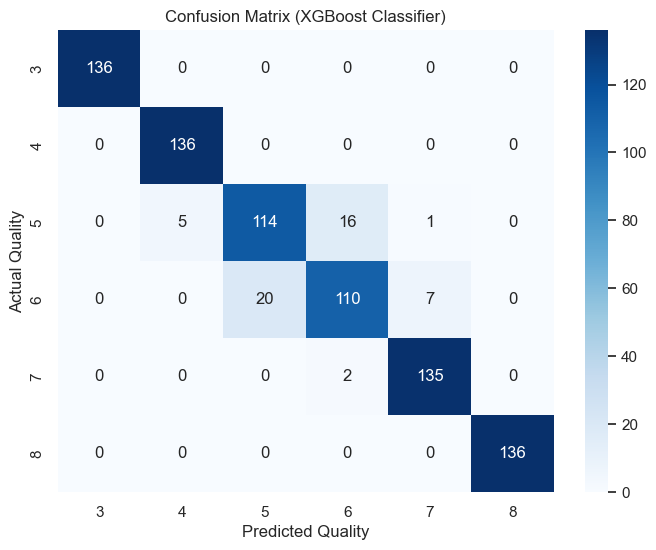

In [45]:
# Predict
y_pred_bal = xgb_clf.predict(X_test_bal)

# Accuracy
acc = accuracy_score(y_test_bal, y_pred_bal)
print(f"Accuracy: {acc * 100:.2f}%")

# Classification Report (decode back for readability)
print("\nClassification Report:")
print(classification_report(le.inverse_transform(y_test_bal), le.inverse_transform(y_pred_bal)))

# Confusion Matrix (decoded)
cm = confusion_matrix(le.inverse_transform(y_test_bal), le.inverse_transform(y_pred_bal))
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.title("Confusion Matrix (XGBoost Classifier)")
plt.show()

In [46]:
# Train on upsampled data
xgb_clf.fit(X_train_bal, y_train_bal)

# Test on original imbalanced test set
X_orig_test = X_test  # From earlier
y_orig_test = y_test

# Predict & decode
y_pred_orig = xgb_clf.predict(X_orig_test)
y_pred_orig_decoded = le.inverse_transform(np.round(y_pred_orig).astype(int))

# Accuracy & report
print("Accuracy on ORIGINAL imbalanced test set:")
print(accuracy_score(y_orig_test, y_pred_orig_decoded) * 100)

print("\nClassification Report:")
print(classification_report(y_orig_test, y_pred_orig_decoded))

Accuracy on ORIGINAL imbalanced test set:
90.3125

Classification Report:
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       0.91      1.00      0.95        10
           5       0.89      0.96      0.93       130
           6       0.96      0.81      0.88       132
           7       0.82      0.98      0.89        42
           8       0.83      1.00      0.91         5

    accuracy                           0.90       320
   macro avg       0.90      0.96      0.93       320
weighted avg       0.91      0.90      0.90       320

